# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [45]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

In [46]:
def __credal_partition_contour_lines(model, X, marker_list):
    mass = model['mass']
    clusters = np.argmax(mass, axis=1)
    contour_list = np.array([])
    datapoint_list = []
    for i in range(mass.shape[1]):
        indices = np.where(clusters == i)
        datapoints = X[indices]
        if len(datapoints) > 3:
            datapoint_list.append(datapoints)
            memberships = mass[indices, i].ravel()
            contour = plt.tricontourf(datapoints[:, 0], datapoints[:, 1], memberships, cmap='viridis', alpha=0.6)
            contour_list = np.append(contour_list, contour)
    
    plt.colorbar(contour_list[0], label='Mass value')
    
    for i in range(len(marker_list)):
        datapoints = datapoint_list[i]
        plt.scatter(datapoints[:, 0], datapoints[:, 1], marker=marker_list[i], s=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Credal partition')
    plt.show()

          0         1
0  3.436618  3.027574
1  4.359538  3.232653
2  4.266793  2.741403
3  2.905252  3.512543
4  3.640983  2.706501


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


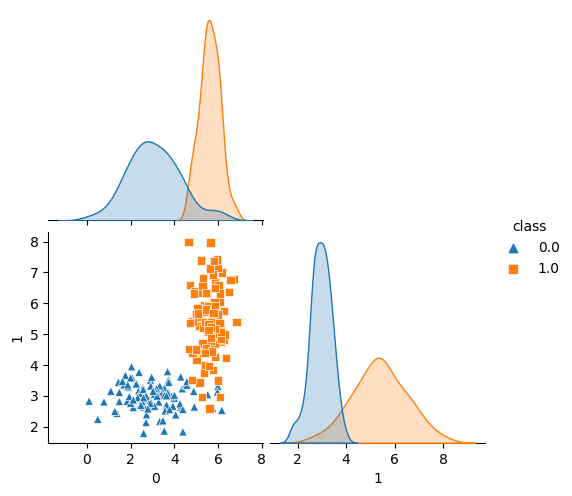

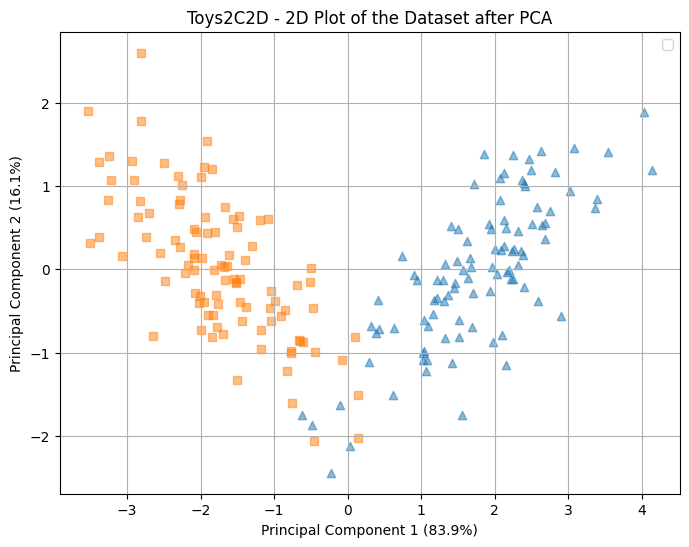

In [47]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [48]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, ntrials=1)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977215, 4.297379437977216, 4.297379437977216]
ARI values: [0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856]
NS values: [0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8705018143492864, 0.8587678523850637, 0.8587678523850637]
NMI values: [0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284]


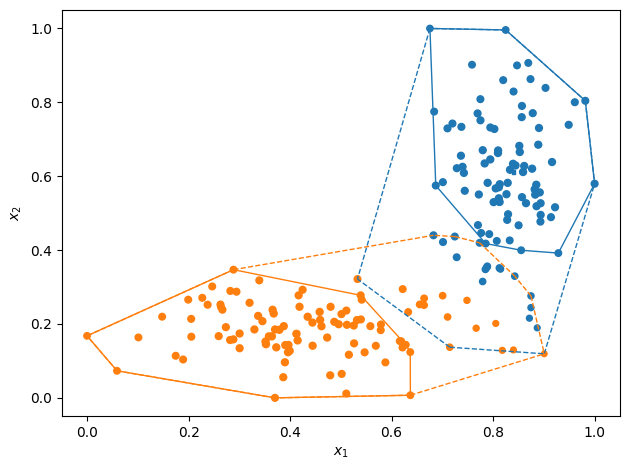

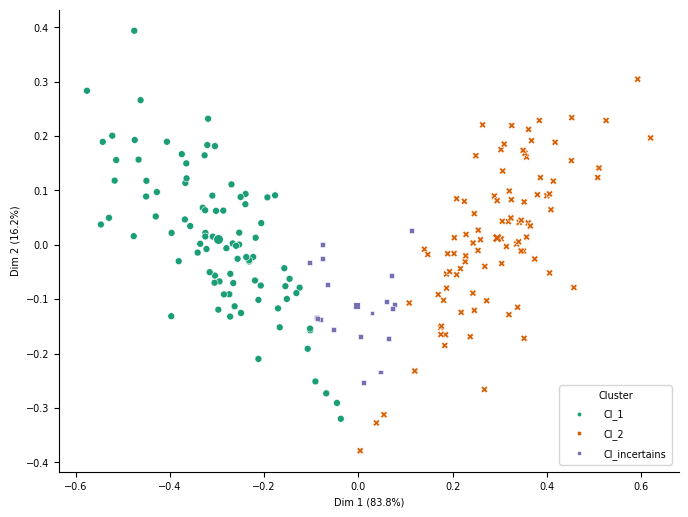

In [49]:
display_results_evidential(X, ecm_models, numeric_labels)

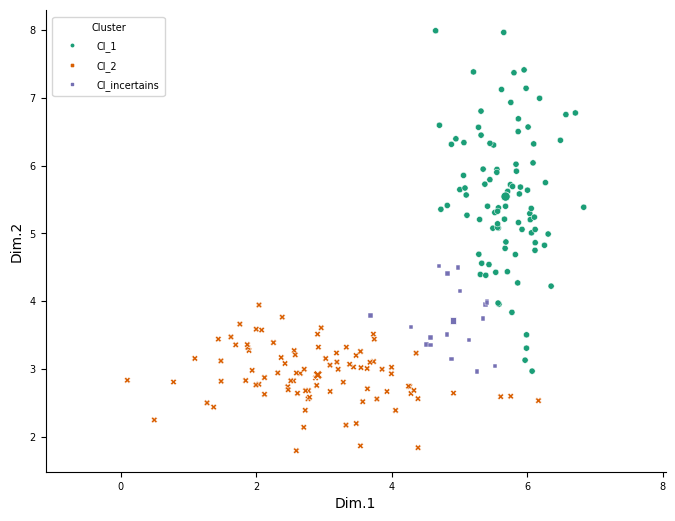

In [50]:
ev_plot_2D(data=dataset[:, :-1], x=ecm_models[0], normalize=False, cex=20)

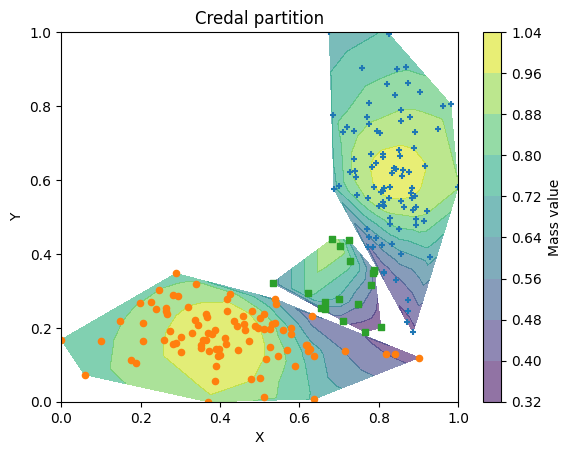

In [51]:
__credal_partition_contour_lines(ecm_models[0], X.values, ['+', 'o', 's'])

## Weighted ECM (WECM)

In [52]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])


J values: [0.5690332235972706, 0.569075000319585, 0.5693855626192718, 0.569458581837193, 0.569615123706486, 0.5696469913942713, 0.5696854638795916, 0.5750309552788024, 0.575198987354939, 0.6259520305280646]
ARI values: [0.8824413461685618, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.8824407464468274, 0.8824407464468274, 0.8448775281781609]
NS values: [1.0176007126582882, 1.0120840856504694, 1.1890884810662294, 1.1866503821622438, 1.1812639693779006, 1.0002396903831252, 1.0002381914820535, 1.1730243133039069, 0.9822243894751936, 0.7083068132327223]
NMI values: [0.8341769839208247, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8149890629501055, 0.8149890629501058, 0.7584955610075942]


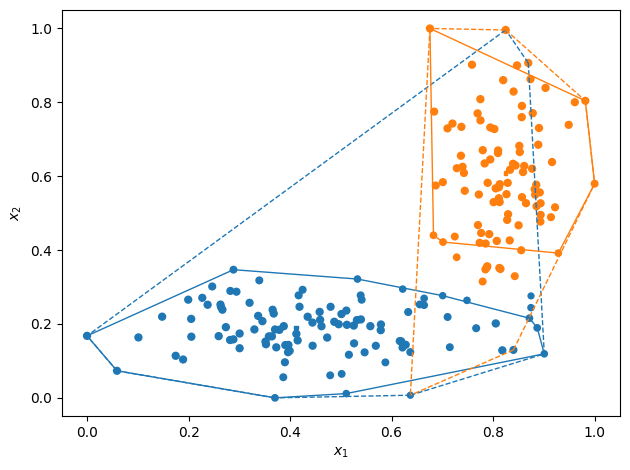

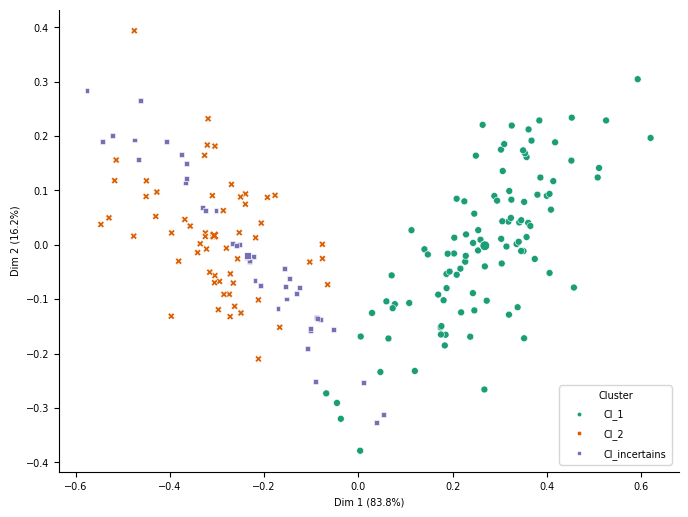

In [53]:
display_results_evidential(X, wecm_models, numeric_labels)

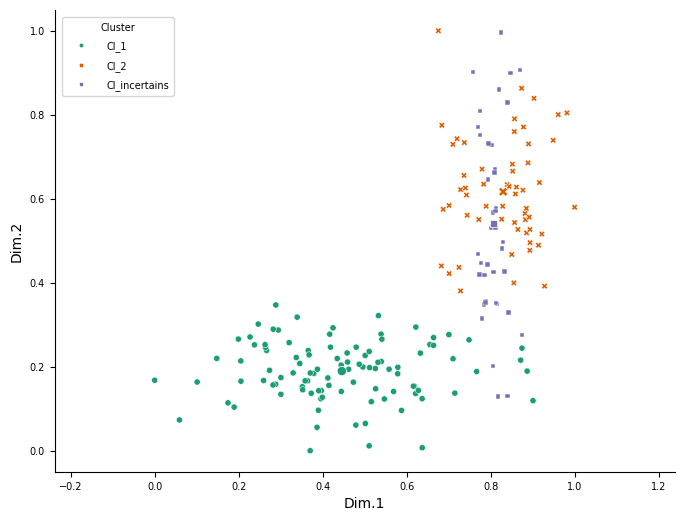

In [54]:
ev_plot_2D(data=X.values, x=wecm_models[0], normalize=False, cex=20)

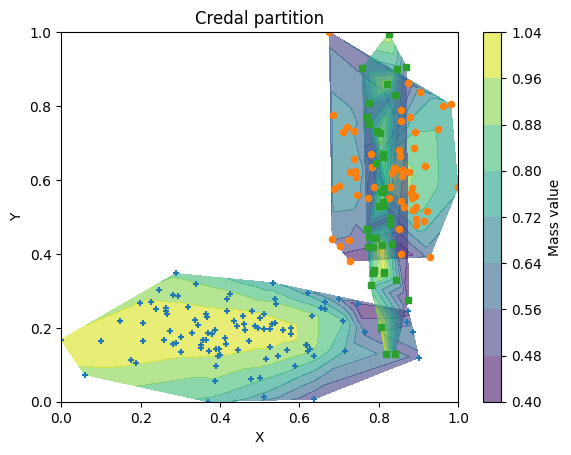

In [55]:
__credal_partition_contour_lines(wecm_models[0], X.values, ['+', 'o', 's'])

In [56]:
print(f"Top weights: {wecm_models[0]['W']}")
centers = wecm_models[0]['gplus']
print(f"Top centers: {centers}")
# plt.figure(figsize=(8, 6))
# plt.scatter(centers[:, 0], centers[:, 1], s=200)
# plt.show()

Top weights: [[0.13921834 0.86078166]
 [0.71726439 0.28273561]
 [0.98897492 0.01102508]]
Top centers: [[0.41172533 0.19075559]
 [0.82363978 0.60879602]
 [0.80887029 0.23203832]]


# Weighted FCM - Keller et al. 2000

In [57]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, epsilon=1e-6, verbose=True)
    keller_models = np.append(keller_models, model)

J values: [0.7087294092602093, 0.7087293394365606, 0.7087294591131955, 0.7087293583423552, 0.7087293886644574, 0.7087293362175382, 0.7087294898957381, 0.7087293976125282, 0.7087293959296331, 0.7087293996438722]
ARI values: [0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8635569191338444, 0.8448775281781609, 0.8635569191338444, 0.8635569191338444, 0.8635569191338444, 0.8448775281781609, 0.8635569191338444]
NMI values: [0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7807654168335445, 0.7584955610075942, 0.7807654168335446, 0.7807654168335445, 0.7807654168335446, 0.7584955610075942, 0.7807654168335445]


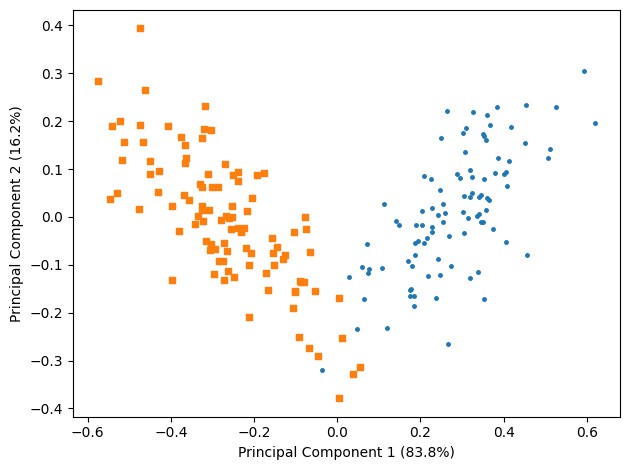

In [58]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [59]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3, verbose=True)
    wang_models = np.append(wang_models, model)

J values: [3.4434895367276024, 3.4434895367276024]
ARI values: [0.8824396669322856, 0.8824396669322856]
NMI values: [0.8072262679734284, 0.8072262679734284]


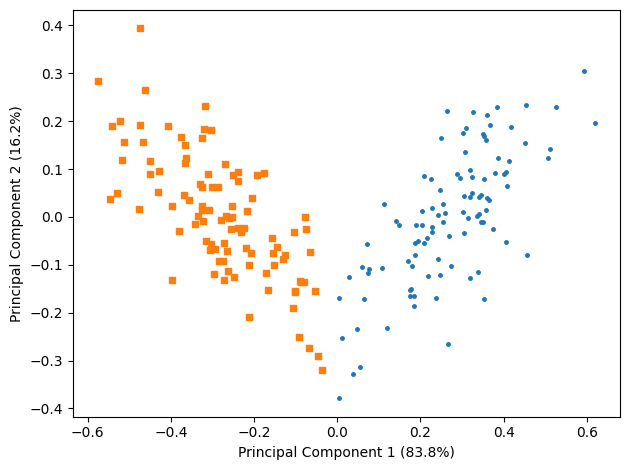

In [60]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [61]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True)
    scad1_models = np.append(scad1_models, model)

J values: [7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275, 7.211049158822275]
ARI values: [0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162, 0.8635567799204162]
NMI values: [0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489, 0.7807787368096489]


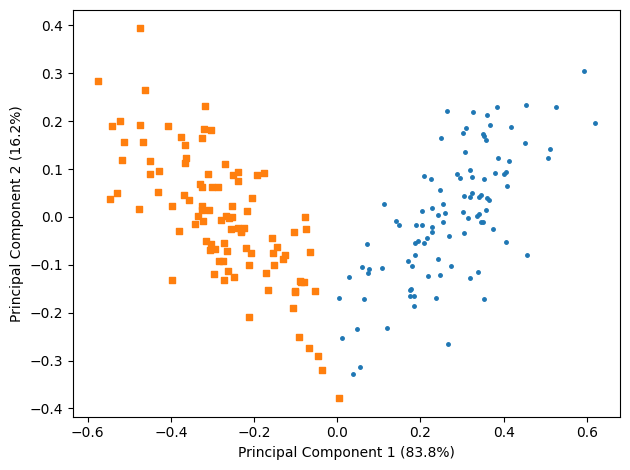

In [62]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [63]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)

J values: [0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516, 0.7194606136990516]
ARI values: [0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609, 0.8448775281781609]
NMI values: [0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942, 0.7584955610075942]


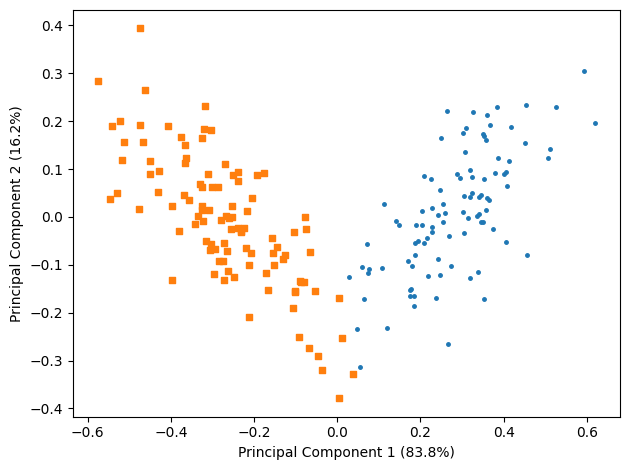

In [64]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [65]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794, 1.3624095169708794]
ARI values: [0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867]
NMI values: [0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975]


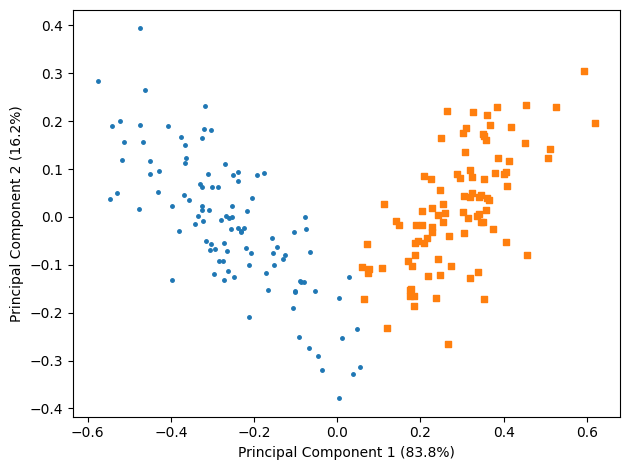

In [66]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [67]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [17.361936831962105, 17.361936831962097, 17.361936831962097, 17.361936831962097, 17.361936831962105, 17.361936831962097, 17.361936831962097, 17.361936831962097, 17.361936831962105, 17.361936831962097]
ARI values: [0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235]
NMI values: [0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188]


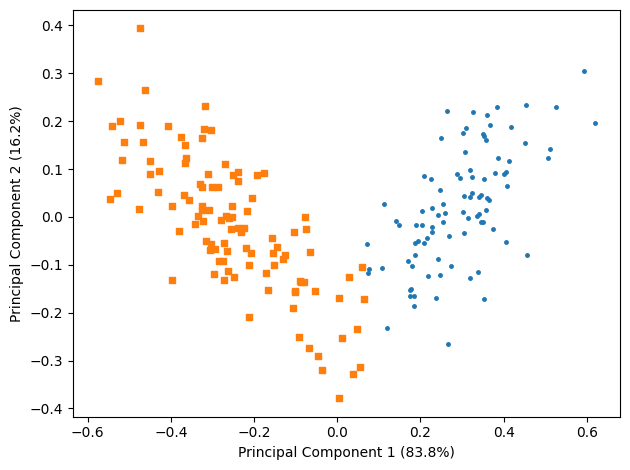

In [68]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)